# Лабораторная работа 4. Функции.

Функция в программировании представляет собой обособленный участок кода, который можно вызывать, обратившись к нему по имени, которым он был назван. При вызове происходит выполнение команд тела функции.

Функции можно сравнить с небольшими программками, которые сами по себе, т. е. автономно, не исполняются, а встраиваются в обычную программу. Нередко их так и называют – подпрограммы. Других ключевых отличий функций от программ нет. Функции также при необходимости могут получать и возвращать данные. Только обычно они их получают не с ввода (клавиатуры, файла и др.), а из вызывающей программы. Сюда же они возвращают результат своей работы.

# Необязательные параметры и сопоставление по ключам

Чтобы сделать некоторые параметры функции необязательными, следует в определении функции присвоить этому параметру начальное значение. Сопоставление по ключам очень удобно использовать, если функция имеет несколько необязательных
параметров. В этом случае не нужно указывать все значения, а достаточно присвоить значение нужному параметру.

In [70]:
def summa (а=2, Ь=3, с=4) : # Все параметры являются необязательными
    return а + Ь + с

In [71]:
print (summa () )        # Использование значений по умолчанию
print (summa (2, 3, 20)) # Позиционное присваивание
print (summa (с=20) )    # Сопоставление по ключам

9
25
25


# Переменное число параметров в функции

Если перед параметром в определении функции указать символ *, то функции можно будет передать произвольное количество параметров. Все переданные параметры сохраняются в кортеже. Для примера напишем функцию суммирования произвольного количества чисел

In [78]:
def summa(*t):
    res = 0
    for i in t: # Перебираем кортеж с переданными параметрами
        res += i
    return res

In [79]:
print(summa(10, 20)) 
print(summa(10, 20, 30, 40, 50, 60)) 

30
210


# Глобальные и локальные переменные

Глобальные переменные — это переменные, объявленные в программе вне функции. В Python глобальные переменные видны в любой части модуля, включая функции.

Локальные переменные— это переменные, объявляемые внутри функций. Если имя локальной переменной совпадает с именем глобальной переменной, то все операции внутри функции осуществляются с локальной переменной, а значение глобальной переменной не изменяется. Локальные переменные видны только внутри тела функции.

In [11]:
def func():
    global globl
    locall = 77 # Локальная переменная
    globl = 25  # Локальная переменная
    print ("Значение locall внутри функции = ", locall)
    print ("Значение globl внутри функции = ", globl)
#    globl = 25 # Глобальная переменная

In [12]:
globl = 10
func() # Вызываем функцию
print ("Значение globl вне функции = ", globl)
try:
    print ("Значение locall вне функции = ", locall) # Вызовет исключение NameError
except NameError: # Обрабатываем исключение
    print ("Переменная locall не видна вне функции")

Значение locall внутри функции =  77
Значение globl внутри функции =  25
Значение globl вне функции =  25
Переменная locall не видна вне функции


# Рекурсия

Рекурсия — это возможность функции вызывать саму себя. Рекурсию удобно использовать для перебора объекта, имеющего заранее неизвестную структуру, или для выполнения неопределенного количества операций. 

Рекурсивные функции являются мощным механизмом в программировании. К сожалению, они не всегда эффективны. Также часто использование рекурсии приводит к ошибкам. Наиболее распространенная из таких ошибок – бесконечная рекурсия, когда цепочка вызовов функций никогда не завершается и продолжается, пока не кончится свободная память в компьютере. 

В качестве примера рассмотрим вычисление факториала.

# Пример 1. Факториал.


Факториалом числа называют произведение всех натуральных чисел до него включительно:

$$ n! = 1 \cdot 2 \cdot ... \cdot n. $$

In [14]:
def factorial_Rec(n):
    if n == 0 or n == 1: return 1
    else: return n * factorial_Rec(n - 1)

Эта программа эквивалентна следующей

In [15]:
def factorial(n):
    factorial = 1
    while n > 1:
        factorial *= n
        n -= 1
    return factorial

In [16]:
factorial_Rec(4)

24

Протестируем корректность работы программ:

In [21]:
assert factorial_Rec(0) == 1
assert factorial_Rec(1) == 1
assert factorial_Rec(4) == 24

assert factorial(0) == 1
assert factorial(1) == 1
assert factorial(4) == 24

Утверждение (ключевое слово) assert существует во многих языках программирования. Это помогает обнаруживать проблемы в начале программы, где причина ясна, а не позже, как побочный эффект какой-либо другой операции. Используя это слово вы говорите программе проверить это условие и немедленно вызвать ошибку, если условие ложно.

In [22]:
import numpy as np

n=50
a = np.zeros(n)

In [23]:
%timeit for i in range (n): a[i] = factorial_Rec(i)
%timeit for i in range (n): a[i] = factorial(i)

174 µs ± 174 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
100 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Функции-генераторы

Функцией-генератором называется функция, которая при последовательных вызовах возвращает очередной элемент какой-либо последовательности. Приостановить выполнение функции и превратить функцию в генератор позволяет ключевое слово yield. Генератор перестает возвращать значения, когда итераций больше нет, при достижении пустой команды return или конца функции. Локальные переменные в функции-генераторе сохраняются между вызовами (в отличие от обычных функций).

Одну такую функцию мы уже встречали, это функция ranged(). Рассмотрим пример с этой функцией.

# Пример 2.

In [43]:
for x in range(5):
    print (x)

0
1
2
3
4


In [24]:
range(5)

range(0, 5)

На её основе легко написать функцию, которая возводит элементы последовательности в заданною степень:

In [25]:
def fun_xiny(x, у):
    for i in range(1, x + 1):
        yield i ** у

In [26]:
for n in fun_xiny(10, 2):
    print(n, end=' ')
print()

for n in fun_xiny(10, 3):
    print(n, end=' ') 

1 4 9 16 25 36 49 64 81 100 
1 8 27 64 125 216 343 512 729 1000 

Однако, функцию-генератор легко можно написать и без ranged():

In [3]:
def four():
    x = 0 
    while x < 4:
        print("В генераторе, x =", x)
        yield x 
        x += 1 

In [4]:
for x in four():
    print('А вне ненератора, x =', x)

В генераторе, x = 0
А вне ненератора, x = 0
В генераторе, x = 1
А вне ненератора, x = 1
В генераторе, x = 2
А вне ненератора, x = 2
В генераторе, x = 3
А вне ненератора, x = 3


# Упражнение 1. Факториал-генератор

Напишите функцию-генератор возвращающую значение факториала.

In [ ]:
def factorial_generator(x):
    mul = 1
    i = 1
    while i <= x:
        mul *= i
        yield mul
        i += 1
for k in factorial_generator(6):
    print(k, end=' ')

# Перехват ошибки.



Как мы уже знаем, программа содержащая синтактические ошибки не может работать. Хотя, это не совсем верно, любая ошибка приводит к появлению во время работы программы (интерпритатора) "исключения", непозволяющего продолжить программу. Если это исключение можно преодолеть (обработать), программа сможет продолжить работать. 

При ошибке в тексте программы в терминологии языка Python возникает исключение, принадлежащее классу SyntaxError. Согласно документации Python синтаксические ошибки все-таки принято относить к ошибкам, а все остальные – к исключениям. В некоторых языках программирования не используется слово "исключение", а ошибки делят на синтаксические и семантические. Нарушение семантики обычно означает, что, хотя выражения написаны верно с точки зрения синтаксиса языка, программа не работает так, как от нее ожидалось. 

Ишибку любого рода можно перехватить (обработать) следующим образом:

Однако, такой универсальный перехват не всегда дает возможность правильно обработать её. Возможно, для эффективного исправления ошибки необходимо глубже понять её природу. Для этого есть ряд ключевых вариантов:

1. ArithmeticError - арифметическая ошибка.
- FloatingPointError - порождается при неудачном выполнении операции с плавающей запятой. На практике встречается нечасто.
- OverflowError - возникает, когда результат арифметической операции слишком велик для представления. Не появляется при обычной работе с целыми числами (так как python поддерживает длинные числа), но может возникать в некоторых других случаях.
- ZeroDivisionError - деление на ноль.
2. IndexError - индекс не входит в диапазон элементов.
3. MemoryError - недостаточно памяти.
4. SyntaxError - синтаксическая ошибка.
5. TypeError - операция применена к объекту несоответствующего типа.
6. ValueError - функция получает аргумент правильного типа, но некорректного значения.

У оператора обработки исключений, кроме except, могут быть еще ветки finally и else (не обязательно обе сразу). Тело finally выполняется всегда, независимо от того, выполнялись ли блоки except в ответ на возникшие исключения или нет. Тело else сработает, если исключений в try не было, т. е. не было переходов на блоки except.

# Пример 3.

In [6]:
def divide():
    try:
        a = float(input("Введите делимое: "))
        b = float(input("Введите делитель: "))
        c = a / b
        print("Частное: %.2f" % c)
    except ValueError:
        print("Нельзя вводить строки")
    except ZeroDivisionError:
        print("Нельзя делить на ноль")
    finally: # выполняется в любом случае
        print("Конец программы")

In [7]:
divide()

Введите делимое: 1
Введите делитель: 2
Частное: 0.50
Конец программы


In [8]:
divide()

Введите делимое: 2
Введите делитель: a
Нельзя вводить строки
Конец программы


# Пример 4. 

Функция для проверки чисел на чётность или не четность. 
(Разберите структуру)

In [27]:
def Parity ():
    
    sf=1
    while bool(sf):
        s=input('Введите число ')
        try:
            # перхватывает любую ошибку !
            sf=int(s)
            f=sf%2
            if not bool(f):
                print('четное')
            else:
                print('не четное')
        except:
            print('Йода говорит: только целые числа нужны нам!')
        

Вызов функции:

In [28]:
Parity ()

Введите число 4
четное
Введите число 5
не четное
Введите число f
Йода говорит: только целые числа нужны нам!
Введите число 6
четное
Введите число h
Йода говорит: только целые числа нужны нам!
Введите число 0
четное


# Упражнение 2. Точный перехват.

Уточните тип возможной ошибки и доработайте соответствующее уведомление пользователю.

In [ ]:
def is_even():
    i = input('Введите целое число: ')
    try:
        print(int(i) % 2)
    except ValueError:
        print(f'Вы ввели не целое число. Тип переменной: {type(i)}')
is_even()

# Пример 5. 

Пример функции: функция для перевода числа из одной системы счисления в другую в виде цикла. 
(Разберите структуру)

In [33]:
def convert_base (num, to_base=10, from_base=10):
    
         alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
         x = int (num, from_base)             # приведение к десятичной базе (ЗАГЛУШКА)
    
         # приведение к новой базе
         it = 0
         digit = []
    
         while x>0:
                    digit.insert(0, alphabet[x % to_base])
                    x = x // to_base
                    it+=1
         for i in range(it):
                    print (digit[i], end = '')

In [34]:
convert_base ('111', to_base=8, from_base=12)

235

Пример функции: функция для перевода числа из одной системы счисления в другую в рекурсивной форме. 
(Разберите структуру)

In [16]:
def convert_base_R(num, to_base=10, from_base=10):
    
    alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    if isinstance(num, str):     # праверка типа, аналогично type(num) == str
        n = int(num, from_base)  # приведение к десятичной базе (ЗАГЛУШКА)
    else:
        n = int(num)
    # приведение к новой базе
    if n < to_base:
        return alphabet[n]
    else:
        return convert_base_R(n // to_base, to_base) + alphabet[n % to_base]

In [17]:
convert_base_R('111', to_base=8, from_base=12)

'235'

# Домашнее задание (базовое):

# Задание 1

Напишите программу, которая запрашивает ввод двух значений. Если хотя бы одно из них не является числом, то должна выполняться конкатенация, т. е. соединение, строк. В остальных случаях введенные числа суммируются.

In [ ]:
a = input('Введите первое значение: ')
b = input('Введите второе значение: ')

if testInput(a) and testInput(b):
    print(int(a) + int(b))
else:
    print(a + b)

# Задание 2. Тортик.

За столом сидят n гостей (вводится с клавиатуры), перед которыми стоит пирог. Пирог и его части можно делить только пополам. Определите, сколько раз нужно делить пирог на ещё более мелкие части, чтобы: 
- каждому из гостей достался хотя бы 1 кусок;
- как минимум половине гостей досталось по 2 куска;
- каждому гостю досталось по 1 куску и при этом ещё хотя бы 10 кусков осталось в запасе.

# Задание 3. Явный Фибоначи.

Для n-го члена в последовательности Фибоначчи существует явная формула:

$$x_n = \frac{1}{2} \left( \left( \frac{1 + \sqrt{5}}{2} \right)^{n+1} - \left( \frac{1 - \sqrt{5}}{2} \right)^{n+1} \right) $$

Поскольку операции с вещественными числами происходят с конечной точностью, то с ростом n, результат вычисления по этой формуле будет все больше отличаться от настоящего числа Фибоначчи. Найдите n, начиная с которого, отличие от истинного значения превысит 0.001.

# Задание 4. Кубики.

В детском садике n детей играют в следующую игру. Перед ними гора из m кубиков, первый ребёнок вынимает из кучи 1 кубик, каждый последующий ребёнок в два раза больше предыдущего и так по кругу. Если число кубиков, которые нужно вынуть, превышает 25, из него вычитается 25 и отсчёт идёт от уменьшенного числа, например, вместо 32 кубиков будет вынуто 7, затем 14 и т. д. Проигравшим считается тот, кто не смог вытащить нужное число кубиков (в куче осталось недостаточно). Определите проигравшего.

# Задание 5. Ханойские башни

Головоломка о ханойской башне была изобретена французским математиком Эдуардом Лукасом в 1883 году. Его вдохновила легенда, рассказывающая о замке Хинду, где эту задачу поставили перед юными жрецами. В начале времён им дали три стержня и стопку из шестидесяти четырёх золотых дисков, каждый из которых немного меньше предыдущего. Требовалось переставить все диски с одного стержня на другой, соблюдая два строгих условия. Во-первых, за раз можно было перемещать только один диск. Во-вторых, нельзя класть бОльший диск поверх меньшего. Жрецы работали (и работают по сей день) очень споро, день и ночь, переставляя каждую секунду по одному диску. Легенда гласит, что когда они закончат свою работу, замок обратится в пыль, и мир исчезнет.

Хотя легенда и интересна, вам не стоит беспокоиться о скором конце света. Число ходов, требующихся для правильной перестановки башни из 64 дисков, равняется $2^{64}−1=18,446,744,073,709,551,615$. Со скоростью один ход в секунду это займёт 584,942,417,355 лет! Большая цифра для такой несложной на первый взгляд головоломки.

Как нам решить эту задачу рекурсивно? С чего бы вы начали? Что является здесь базовым случаем? Давайте подумаем над этим от конца к началу. Предположим, изначально на первом колышке у вас находится башня из пяти дисков. Если вы уже знаете, как передвинуть четыре из них на второй колышек, то можете с лёгкостью переложить нижний диск на стержень №3, а затем переложить туда же башню со стержня №2. Но что, если вы понятия не имеете, как переместить башню из четырёх верхних? Предположим, что известно, как передвинуть башню из трёх верхних дисков на третий колышек. Тогда с перемещением четвёртого трудностей не возникнет: переложите его на второй стержень, а затем положите сверху те, что нанизаны на третий. Но если вы не знаете как переместить три? Что ж, можно переложить башню из двух дисков на стержень №2, а третий - на стержень №3, а потом сверху положить башню из двух. Но если до сих пор не понятно, как это сделать? Уверен, что вы согласитесь: переместить один диск на третий колышек легче лёгкого - тривиальнее ничего не найдётся. Звучит как базовый случай, а?

Вот общая схема того, как переместить башню с исходного стержня на заданный с использованием промежуточного:
- Передвинуть башню из (количество дисков - 1) на промежуточный колышек, используя при этом заданный.
- Положить оставшийся диск на заданный стержень.
- Переместить башню из оставшихся на промежуточном стержне дисков на конечный, используя при этом первоначальный колышек.

Напишите функцию move (n, x, y), которая печатает последовательность перекладываний дисков для перемещения пирамидки высоты n со стержня номер x на стержень номер y. 

Реализуйте алгоритм в двух вариантах: на основе цикла и на основе рекурсии.

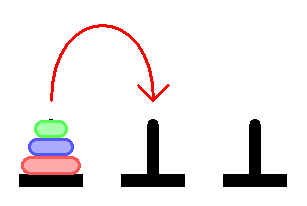

In [2]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Ханойская башня.gif")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [ ]:
def recursionMaker(n, x, y):
    # n - количество дисков, которые нужно переместить на место y
    if n > 1:
        recursionMaker(n - 1, x, 6 - x - y)
    print('%i --> %i' % (x, y))
    if n - 1 > 1:
        recursionMaker(n - 1, 6 - x - y, y)
    elif n - 1 == 1:
        print('%i --> %i' % (6 - x - y, y))
def fixedHanoyCycleAlgorithm(n, x, y):
    disks = [0] * n # позиция каждого диска
    cntr = [0] * n # счётчик использования
    corrs = { 0 : x, 1 : y, 2 : 6 - x - y }
    for i in range(2 ** n):
        for disk in range(n):
            if 2 ** disk + 2 ** (disk + 1) * cntr[disk] == i:
                cntr[disk] += 1
                old = disks[disk]
                disks[disk] = (disks[disk] + 1 + (n - 1 - disk) % 2) % 3
                print("%i: %i --> %i" % (disk + 1, corrs[old], corrs[disks[disk]]))
                break
n = int(input('Введите высоту пирамидки (в дисках): '))
x = int(input('Введите номер стержня, на котором расположена пирамидка: '))
y = int(input('Введите номер стержня, на который нужно переместить пирамидку: '))

print('\nПример элемента последовательности перекладываний: ')
print('"1 --> 2". Это значит, что диск переложили с первого колышка на второй.\n')

if not (1 <= x <= 3 and 1 <= y <= 3):
    print('Программа не будет выполняться. В условии задачи сказано, что стержней всего три.')
elif n < 1 or x == y:
    print('Программе выполняться не требуется.')
else: 
    # запускаем две функции по очереди и измеряем время
    recursionMaker(n, x, y); print()
    
    print('Рекурсивный алгоритм.')
    input('Продолжить')
    
    fixedHanoyCycleAlgorithm(n, x, y); print()
    
    print('Циклический алгоритм.')
    input('Завершить')

# Домашнее задание (дополнительное):

# Задание "Вне системы"

Написать программу совершающую элементарные алгебраические операции ($A+B$, $A-B$, $A*B$, $A/B$) с числами в произвольной системе исчисления. (Подсказка: обратите внимание на устройство программы convert_base и см. рисунок с выполенеием операций + и *.)

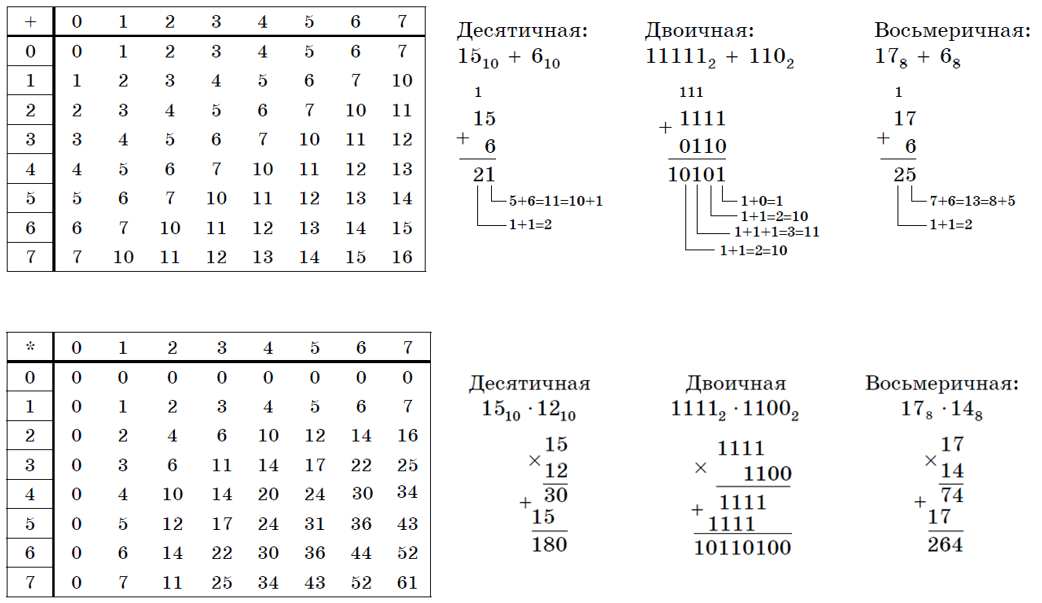

In [1]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("операции.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [ ]:
try:
    print('Выберите операцию:')
    print('1) сложение')
    print('2) умножение')
    print('3) вычитание')
    print('4) деление (только целочисленное): ', end = '')
    task = int(input())
    a, b = input('Введите два числа в произвольных ' +
                 'системах счисления через пробел: ').split()
    a_base, b_base = map(int, input('Введите системы счисления ' +
                                    'чисел через пробел: ').split())
    a_10 = int(convert_base_R(a, from_base = a_base))
    b_10 = int(convert_base_R(b, from_base = b_base))
    if b_10 == 0 and task == 4:
        raise ZeroDivisionError
    c_base = int(input('Введите систему счисления результата: '))
    if task == 1:
        print('Результат:', convert_base_R(a_10 + b_10, to_base = c_base))
    elif task == 2:
        print('Результат:', convert_base_R(a_10 * b_10, to_base = c_base))
    elif task == 3:
        print('Результат:', convert_base_R(a_10 - b_10, to_base = c_base))
    elif task == 4:
        print('Результат:', convert_base_R(a_10 // b_10, to_base = c_base))
except ValueError:
    print('Ошибка введенных данных.')
    ERRMSG()
except ZeroDivisionError:
    print('Ошибка деления на ноль.')
    ERRMSG()
except IndexError:
    print('Ошибка индекса.')
    ERRMSG()

# Задание "Быстрый обратный квадратный корень" 

Быстрый обратный квадратный корень — это быстрый приближённый алгоритм вычисления обратного квадратного корня 

$$ y=\frac{1}{\sqrt{x}} $$ 

для положительных 32-битных чисел с плавающей запятой. Алгоритм использует целочисленные операции «вычесть» и «битовый сдвиг», а также дробные «вычесть» и «умножить» — без медленных операций «разделить» и «квадратный корень». Несмотря на «хакерство» на битовом уровне, ошибка такого метода вычисления составляет всего несколько процентов, чего обычно не хватает для настоящих численных расчётов, однако вполне достаточно для трёхмерной графики. 

Алгоритм был, вероятно, разработан в Silicon Graphics в 1990-х, а реализация появилась в 1999 году в исходном коде компьютерной игры Quake III Arena, но данный метод не появлялся на общедоступных форумах до 2000-х годов. 

Алгоритм генерирует достаточно точные результаты, используя уникальное первое приближение метода Ньютона. Основным преимуществом алгоритма является отказ от дорогих вычислительных операций с плавающей запятой в пользу целочисленных операций. Обратные квадратные корни используются для расчета углов падения и отражения для освещения и затенения в компьютерной графике. Однако, версия для double бессмысленна, так как точность вычислений не увеличится.

См. подробности на https://ru.wikipedia.org/wiki/Быстрый_обратный_квадратный_корень#cite_note-7

Напишите программу, реализующую этот алгоритм. Для этого напишите функцию для быстрого вычисления обратного корня Q_rsqrt(), оцените ошибку такого метода вычисления. 

Сделайте одну итерацию с помощью метода Ньютона, котрая в данном случае имеет вид:

$$ y_{n+1}=y_{n}(1.5-0.5xy_{n}^{2}) $$.

Утверждается, что после этого погрешность обычно не превышает 1%. Проверьте так ли это.

# Задание "Умножение Карацубы"

(n)-числа — те числа, которые требуют не более n элементов элементарных типов (цифр) в своём представлении. Будем считать, что с такими числами умеет работать вычислитель. Однако, если необходимо перемножить числа в два раза длиннее - (2n)-числа, как это сделать?

Можно воспользоваться наивным алгоритмом, основанном на правилах умножения и переносе разряжов. Однако, такой алгоритм слишком накладен... К счастью, имеется более быстрый алгоритм. Он изобретён в 1960-х годах аспирантом А. Н. Колмогорова Анатолием Карацубой и с тех пор является неизменным участником любых библиотек работы с большими числами. Нас он интересует постольку, поскольку реализует принцип разделяй и властвуй. Пусть нам требуется перемножить два (2n)-числа. Введём константу T, на единицу большую максимального числа, представляемого (n)-числом. Тогда любое (2n)-число X можно представить в виде суммы $Tx_u + x_l$. 

$$N_1 = Tx_1 + y_1$$
$$N_2 = Tx_2 + y_2$$

При умножении в столбик

$$N_1 × N_2 = T^2x_1x_2 + T(x_1y_2 + x_2y_1) + y_1y_2.$$

Это — четыре операции умножения и три операции сложения. Число T определяет, сколько нулей нужно добавить к концу числа в соответствующей системе счисления.

Алгоритм Карацубы находит произведение по другой формуле:

$$N_1 × N_2 = T^2x_1x_2 + T((x_1 + y_1)(x_2 + y_2) − x_1x_2 − y_1y_2) + y_1y_2.$$

Напишите программу, реализующую этот алгоритм. Представьте входные и выходные данные в виде формата list хранящего значения x и y. 

In [ ]:
def kar():
    spis = []
    x = input('Введите первое число: ')
    spis.append(x)
    y = input('Введите второе число: ')
    spis.append(y)
    if len(x) <= 10 and len(y) <= 10:
        return (int(x))*(int(y))
    else:
        a = len(x)
        if a % 2 == 0:
            mid = a / 2
            xs, ys = str(x), str(y)
            
            x_list, y_list = [i for i in xs], [i for i in ys]
            
            first_halfX, second_halfX = x_list[: a//2], x_list[a//2 :]
            first_halfY, second_halfY = y_list[: a//2], y_list[a//2 :]
            
            xq, xw = ''.join(first_halfX),''.join(second_halfX)
            x1, x2 = int(xq), int(xw)
            yq,yw = ''.join(first_halfY), ''.join(second_halfY)
            y1, y2 = int(yq), int(yw)
        elif a % 2 == 1:
            mid = (a + 1) / 2
            xs, ys = str(x), str(y)
            x_list, y_list = [i for i in xs], [i for i in ys]
            
            x_list.append(0)
            y_list.append(0)
            
            first_halfX, second_halfX = x_list[: a // 2], x_list[a // 2 :]
            first_halfY, second_halfY = y_list[: a // 2], y_list[a // 2 :]
            
            second_halfX.pop()
            second_halfY.pop()
            xq, xw = ''.join(first_halfX),''.join(second_halfX)
            x1, x2 = int(xq), int(xw)
            yq,yw = ''.join(first_halfY), ''.join(second_halfY)
            y1, y2 = int(yq), int(yw)
    mult = x2 * y2 + ((x1 + x2) * (y1 + y2) - y1 * x1 - y2 * x2) * 10 ** mid + y1 * x1 * 10 ** (2 * mid)
    spis.append(mult)
    print(spis)
kar()